In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as mpl
import numpy as np
import datetime

from shapely.geometry import Point
from datetime import timedelta

In [55]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df.drop(df.columns.difference(['LATITUDE','LONGITUDE']), 1, inplace=True)

/var/folders/g_/pvfmf7sj55529m_0ck0t474r0000gn/T/ipykernel_46149/1568185449.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['LATITUDE','LONGITUDE']), 1, inplace=True)


In [56]:
df.head(5)
# len(df)

,LATITUDE,LONGITUDE
0,41.884547,-87.641201
1,41.968562,-87.740659
2,41.886336,-87.716203
3,41.749348,-87.721097
4,41.925111,-87.667997


In [57]:
df.dropna(inplace=True)
len(df)

664904

In [58]:
df = df[df.LATITUDE != 0]

In [59]:
len(df)

664866

In [60]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=4326)

In [61]:
gdf.columns
gdf.head()

,LATITUDE,LONGITUDE,geometry
0,41.884547,-87.641201,POINT (-87.64120 41.88455)
1,41.968562,-87.740659,POINT (-87.74066 41.96856)
2,41.886336,-87.716203,POINT (-87.71620 41.88634)
3,41.749348,-87.721097,POINT (-87.72110 41.74935)
4,41.925111,-87.667997,POINT (-87.66800 41.92511)


<AxesSubplot:>

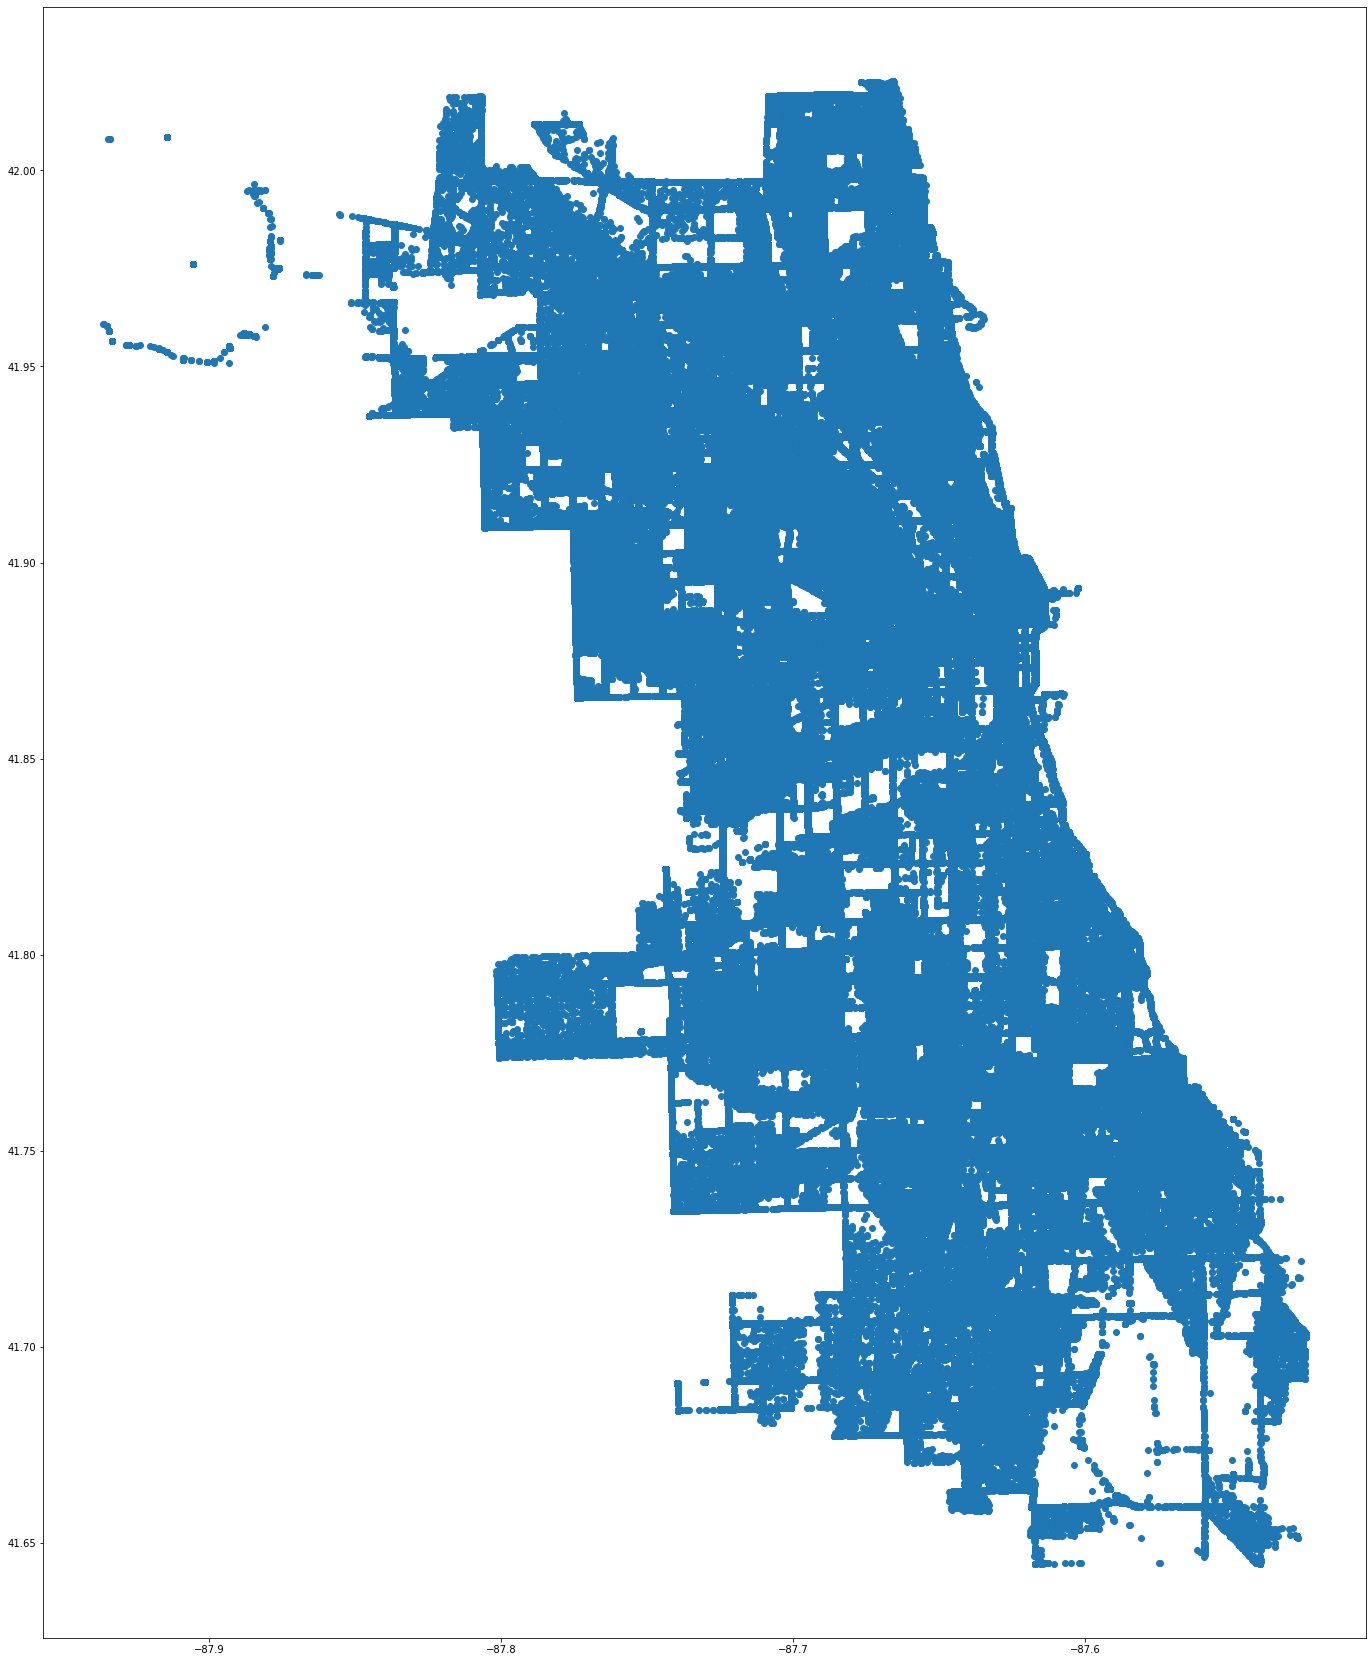

In [62]:
gdf.plot(figsize=(30,30))

In [63]:
chicago = gpd.read_file('chicago.geojson')

In [64]:
# chicago.plot()
chicago.head()

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
1,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ..."
2,United Center,UNITED CENTER,32520512.7053,23101.363745,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ..."
4,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ..."


In [65]:
joined = gpd.sjoin(gdf, chicago, predicate='within')
joined.head()

,LATITUDE,LONGITUDE,geometry,index_right,pri_neigh,sec_neigh,shape_area,shape_len
0,41.884547,-87.641201,POINT (-87.64120 41.88455),40,West Loop,WEST LOOP,52945063.8967,43907.671821
65,41.867548,-87.639347,POINT (-87.63935 41.86755),40,West Loop,WEST LOOP,52945063.8967,43907.671821
84,41.880373,-87.656954,POINT (-87.65695 41.88037),40,West Loop,WEST LOOP,52945063.8967,43907.671821
93,41.867318,-87.643044,POINT (-87.64304 41.86732),40,West Loop,WEST LOOP,52945063.8967,43907.671821
106,41.876628,-87.657054,POINT (-87.65705 41.87663),40,West Loop,WEST LOOP,52945063.8967,43907.671821


In [66]:
joined = joined.groupby('pri_neigh').count()
joined = joined.filter(['geometry'])
joined = joined.rename(columns={'geometry': 'count'})


In [67]:
joined

,count
pri_neigh,
Albany Park,6747
Andersonville,1071
Archer Heights,5525
Armour Square,1521
Ashburn,9189
...,...
West Ridge,13947
West Town,9678
Wicker Park,4834


In [68]:
merged = pd.merge(joined, chicago, right_on='pri_neigh', left_index=True)

In [69]:
merged.columns

Index(['count', 'pri_neigh', 'sec_neigh', 'shape_area', 'shape_len',
       'geometry'],
      dtype='object')

In [70]:
merged

,count,pri_neigh,sec_neigh,shape_area,shape_len,geometry
52,6747,Albany Park,"NORTH PARK,ALBANY PARK",53542230.819,39339.016439,"MULTIPOLYGON (((-87.70404 41.97355, -87.70403 ..."
42,1071,Andersonville,ANDERSONVILLE,9584592.89906,12534.092625,"MULTIPOLYGON (((-87.66114 41.97630, -87.66132 ..."
78,5525,Archer Heights,"ARCHER HEIGHTS,WEST ELSDON",55922505.7212,31880.02103,"MULTIPOLYGON (((-87.71437 41.82604, -87.71436 ..."
8,1521,Armour Square,"ARMOUR SQUARE,CHINATOWN",17141468.6356,24359.189625,"MULTIPOLYGON (((-87.62920 41.84713, -87.62919 ..."
21,9189,Ashburn,ASHBURN,135460337.208,54818.154632,"MULTIPOLYGON (((-87.71255 41.75734, -87.71252 ..."
...,...,...,...,...,...,...
55,13947,West Ridge,WEST RIDGE,98429094.8621,43020.689458,"MULTIPOLYGON (((-87.68465 42.01948, -87.68464 ..."
82,9678,West Town,"WICKER PARK,WEST TOWN",58507728.4211,46673.620546,"MULTIPOLYGON (((-87.65686 41.91078, -87.65685 ..."
88,4834,Wicker Park,"WICKER PARK,WEST TOWN",26853193.0926,21992.660946,"MULTIPOLYGON (((-87.66780 41.91430, -87.66780 ..."
43,5533,Woodlawn,WOODLAWN,40515739.083,28960.059037,"MULTIPOLYGON (((-87.58630 41.77334, -87.58664 ..."


In [71]:
gdf2 = gpd.GeoDataFrame(merged, crs="EPSG:4326", geometry=merged['geometry'])

<AxesSubplot:>

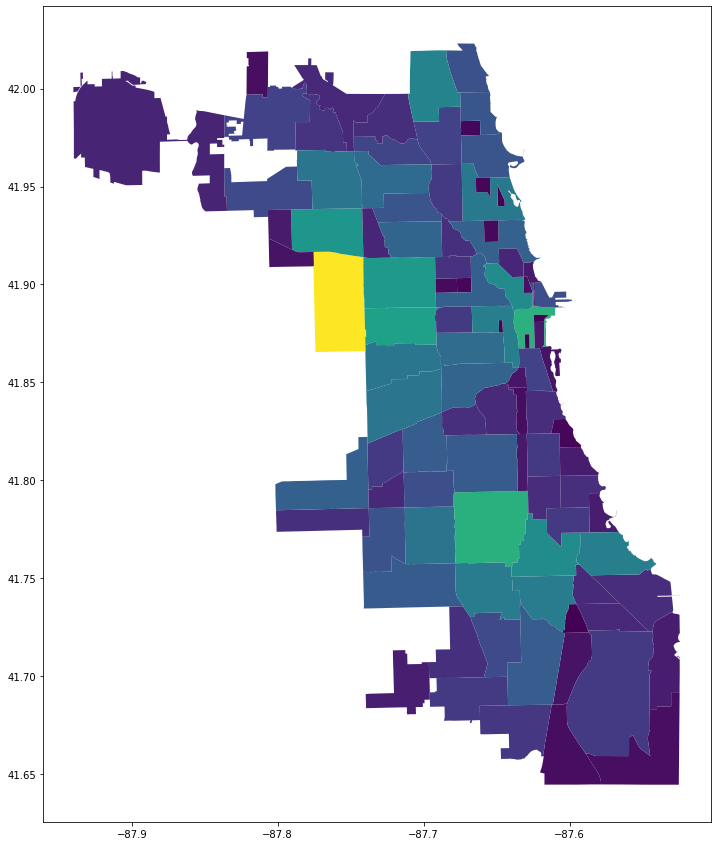

In [72]:
gdf2.plot('count', figsize=(15,15))